In [10]:
# Import der benötigten Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laden der CSV-Datei mit korrektem Trennzeichen
file_path = "REM2030_v2015_car_info.csv"  # Pfad zur Datei anpassen
df = pd.read_csv(file_path, delimiter=';')


# Größe

## Anzahl der Unternehmen nach Sektor

C:\Users\pasca\AppData\Local\Temp\ipykernel_17432\799089415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sector_counts.values, y=sector_counts.index, palette="Blues_r")


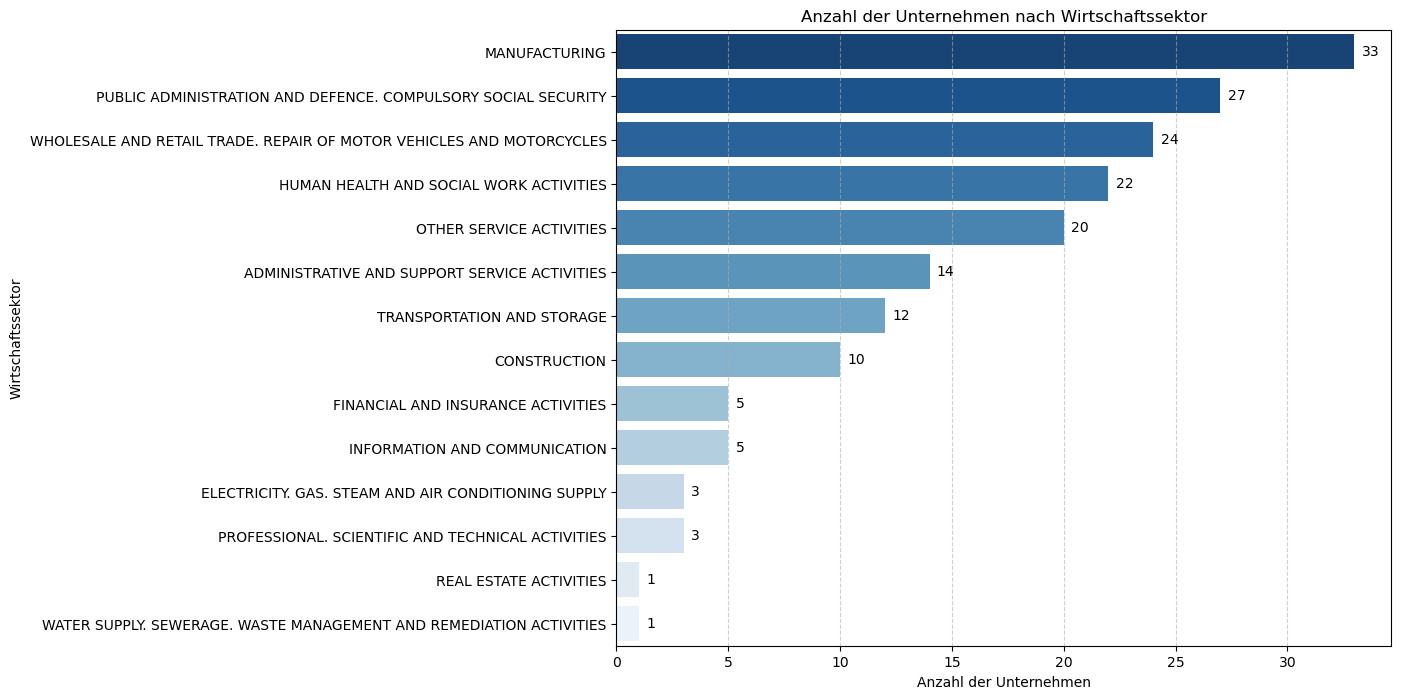

In [28]:
# Korrekte Berechnung der Anzahl der Unternehmen pro Wirtschaftssektor
sector_counts = df.groupby("economic_sector")["company_id"].nunique().sort_values(ascending=False)

# Erstellen des Plots
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=sector_counts.values, y=sector_counts.index, palette="Blues_r")

# Werte auf den Balken anzeigen für bessere Lesbarkeit
for index, value in enumerate(sector_counts.values):
    ax.text(value + max(sector_counts.values) * 0.01,  # Leicht versetzt für bessere Sichtbarkeit
            index, 
            f"{value}", 
            va='center', 
            fontsize=10, 
            color="black")

# Achsenbeschriftung und Titel
plt.xlabel("Anzahl der Unternehmen")
plt.ylabel("Wirtschaftssektor")
plt.title("Anzahl der Unternehmen nach Wirtschaftssektor")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()

## Durchschnittliche Unternehmensgröße

C:\Users\pasca\AppData\Local\Temp\ipykernel_17432\3851665773.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_company_size_sorted.values, y=avg_company_size_sorted.index, palette="Blues_r")


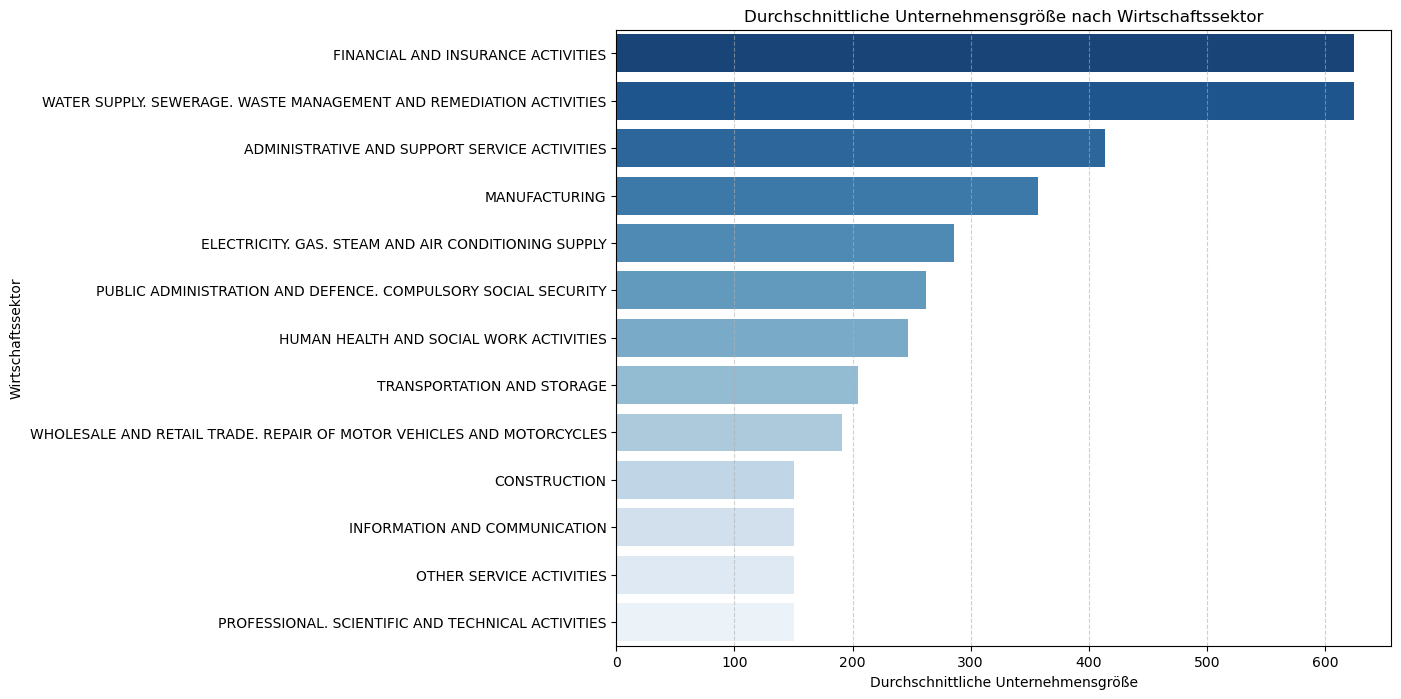

In [12]:
# Mapping der Unternehmensgröße zu numerischen Werten für die Berechnung des Durchschnitts
company_size_mapping = {
    "1 to 10": 5,
    "11 to 50": 30,
    "51 to 250": 150,
    "251 to 1000": 625,
    "1001 and more": 1500
}

# Mapping auf die Spalte anwenden
df["company_size_numeric"] = df["company_size"].map(company_size_mapping)

# Durchschnittliche Unternehmensgröße nach Wirtschaftssektor berechnen und sortieren
avg_company_size = df.groupby("economic_sector")["company_size_numeric"].mean()

# Entfernen von NaN-Werten und Sortieren in absteigender Reihenfolge
avg_company_size_sorted = avg_company_size.dropna().sort_values(ascending=False)

# Erstellen des Plots
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=avg_company_size_sorted.values, y=avg_company_size_sorted.index, palette="Blues_r")

# Annotieren der Balken mit den durchschnittlichen Unternehmensgrößen
#for index, value in enumerate(avg_company_size_sorted.values):
#    ax.text(value + 20, index, f"{int(value)}", va='center', fontsize=10)

# Achsenbeschriftung und Titel
plt.xlabel("Durchschnittliche Unternehmensgröße")
plt.ylabel("Wirtschaftssektor")
plt.title("Durchschnittliche Unternehmensgröße nach Wirtschaftssektor")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()

## Anzahl der Fahrzeuge pro Sektor

Gesamtzahl der Fahrzeuge über alle Sektoren: 630


C:\Users\pasca\AppData\Local\Temp\ipykernel_17432\2246045168.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_vehicles_per_sector.values, y=total_vehicles_per_sector.index, palette="Blues_r")


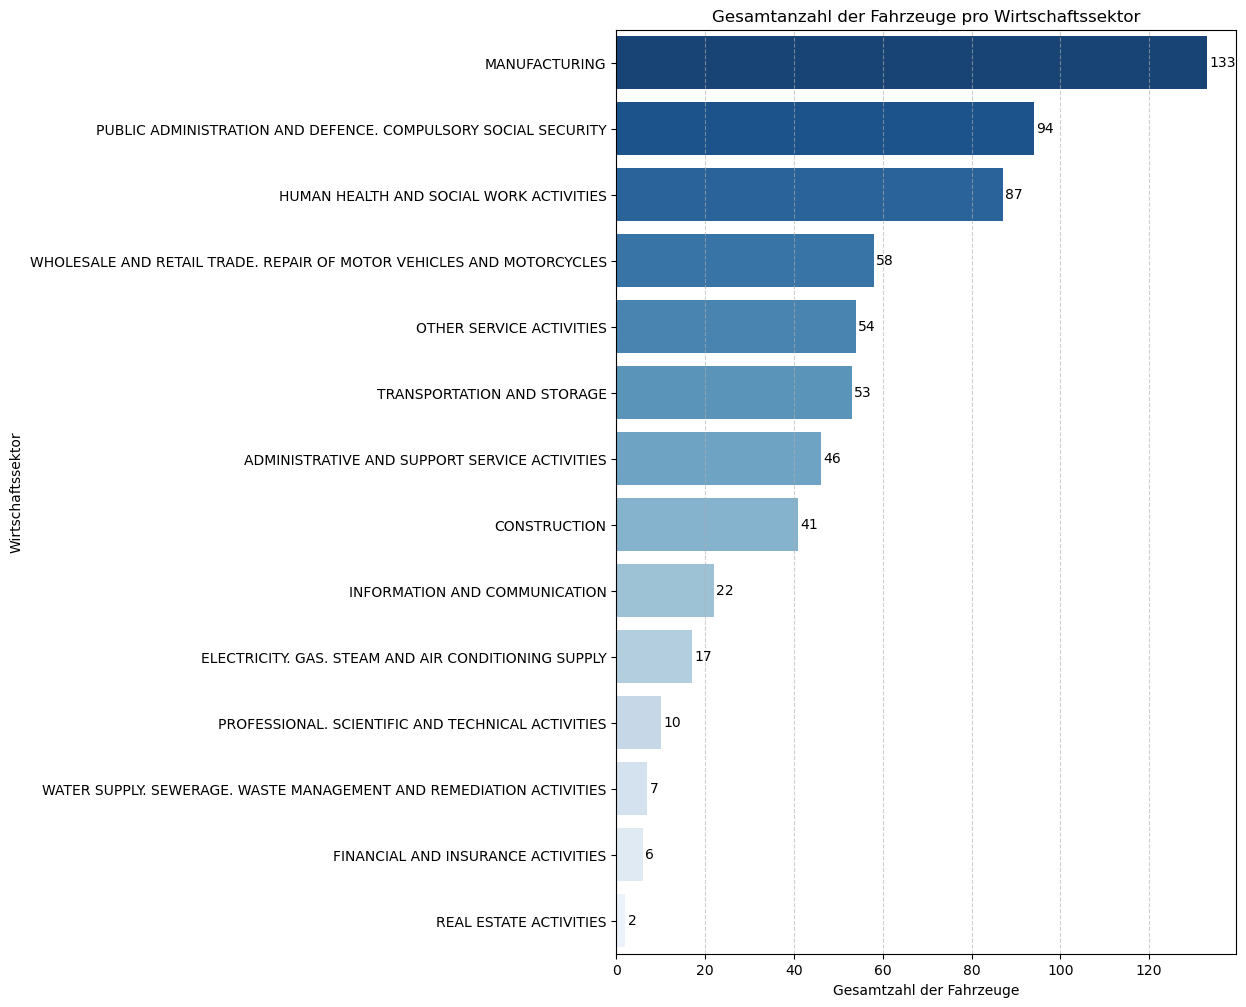

In [30]:

# Berechnen der Gesamtanzahl der Fahrzeuge pro Wirtschaftssektor
total_vehicles_per_sector = df.groupby("economic_sector").size().sort_values(ascending=False)

# Gesamtanzahl der Fahrzeuge berechnen und ausgeben
total_vehicles_count = total_vehicles_per_sector.sum()
print(f"Gesamtzahl der Fahrzeuge über alle Sektoren: {total_vehicles_count}")


# Erstellen des Plots mit Hochformat für bessere Lesbarkeit in Word
plt.figure(figsize=(8, 12))  # Schmaler und höher für eine bessere Darstellung

# Balkendiagramm für die Gesamtanzahl der Fahrzeuge pro Wirtschaftssektor
ax = sns.barplot(x=total_vehicles_per_sector.values, y=total_vehicles_per_sector.index, palette="Blues_r")

# Werte auf den Balken anzeigen für bessere Lesbarkeit
for index, value in enumerate(total_vehicles_per_sector.values):
    ax.text(value + 0.5, index, f"{value}", va='center', fontsize=10)

# Achsenbeschriftungen und Titel
plt.xlabel("Gesamtzahl der Fahrzeuge")
plt.ylabel("Wirtschaftssektor")
plt.title("Gesamtanzahl der Fahrzeuge pro Wirtschaftssektor")
plt.grid(axis='x', linestyle='--', alpha=0.6)

## Speichern des Plots als SVG für Word
#plt.savefig("Gesamtanzahl_der_Fahrzeuge_pro_Wirtschaftssektor.svg", format="svg", dpi=300)

# Anzeigen des Plots
plt.show()

## Anzahl der Fahrzeuge nach Fahrzeuggröße

<Figure size 1000x1400 with 0 Axes>

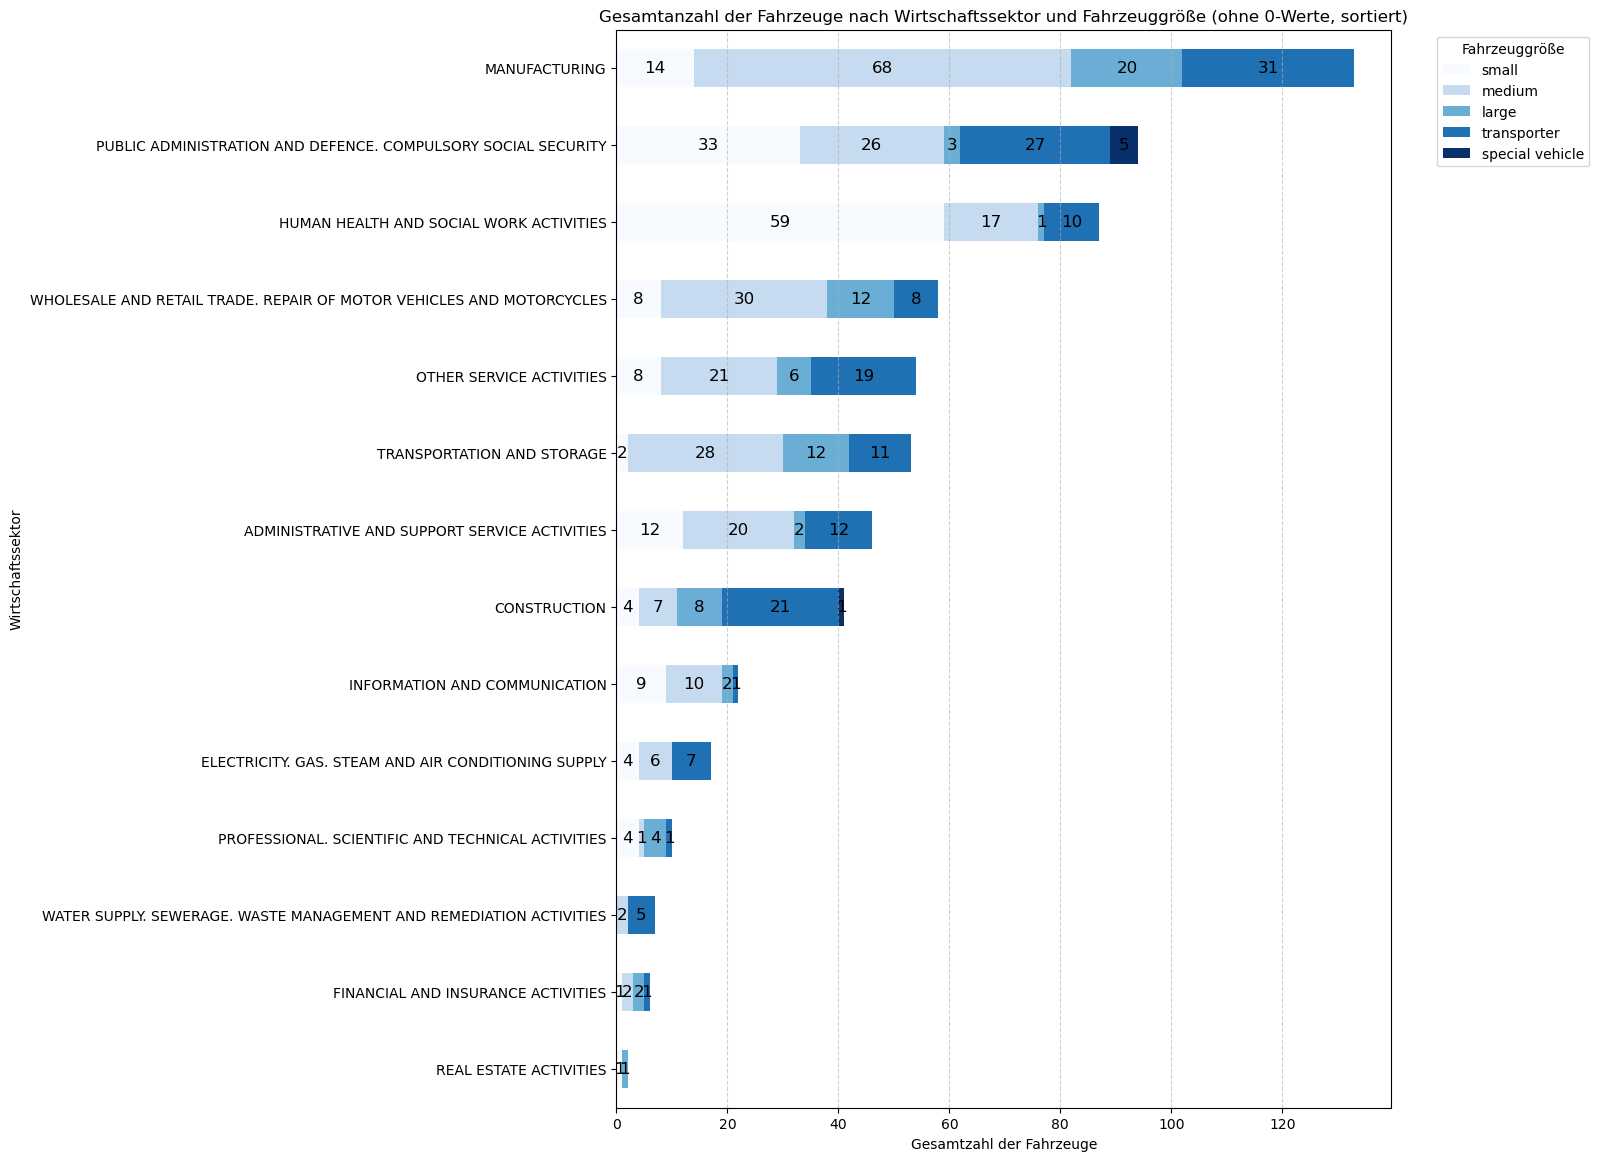

In [43]:
# Erstellen des gestapelten Balkendiagramms mit verbreiterten Balken für bessere Lesbarkeit
plt.figure(figsize=(10, 14))  # Größere Breite für längere Balken und bessere Lesbarkeit

ax = total_vehicles_per_sector_size.plot(kind="barh", stacked=True, colormap="Blues", figsize=(10, 14))

# Werte auf den Balken anzeigen für bessere Lesbarkeit (Nur wenn größer als 0)
for container in ax.containers:
    labels = [f"{int(value)}" if value > 0 else "" for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=12, color="black")

# Labels und Titel
plt.xlabel("Gesamtzahl der Fahrzeuge")
plt.ylabel("Wirtschaftssektor")
plt.title("Gesamtanzahl der Fahrzeuge nach Wirtschaftssektor und Fahrzeuggröße (ohne 0-Werte, sortiert)")
plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Speichern des Plots als SVG für Word
#plt.savefig("Gesamtanzahl_der_Fahrzeuge_pro_Wirtschaftssektor_und_Groesse_Sortiert_Optimiert.svg", format="svg", dpi=300)

# Anzeigen des Plots
plt.show()


## Prozentuale Verteilung der Fahrzeuggröße

<Figure size 1200x1400 with 0 Axes>

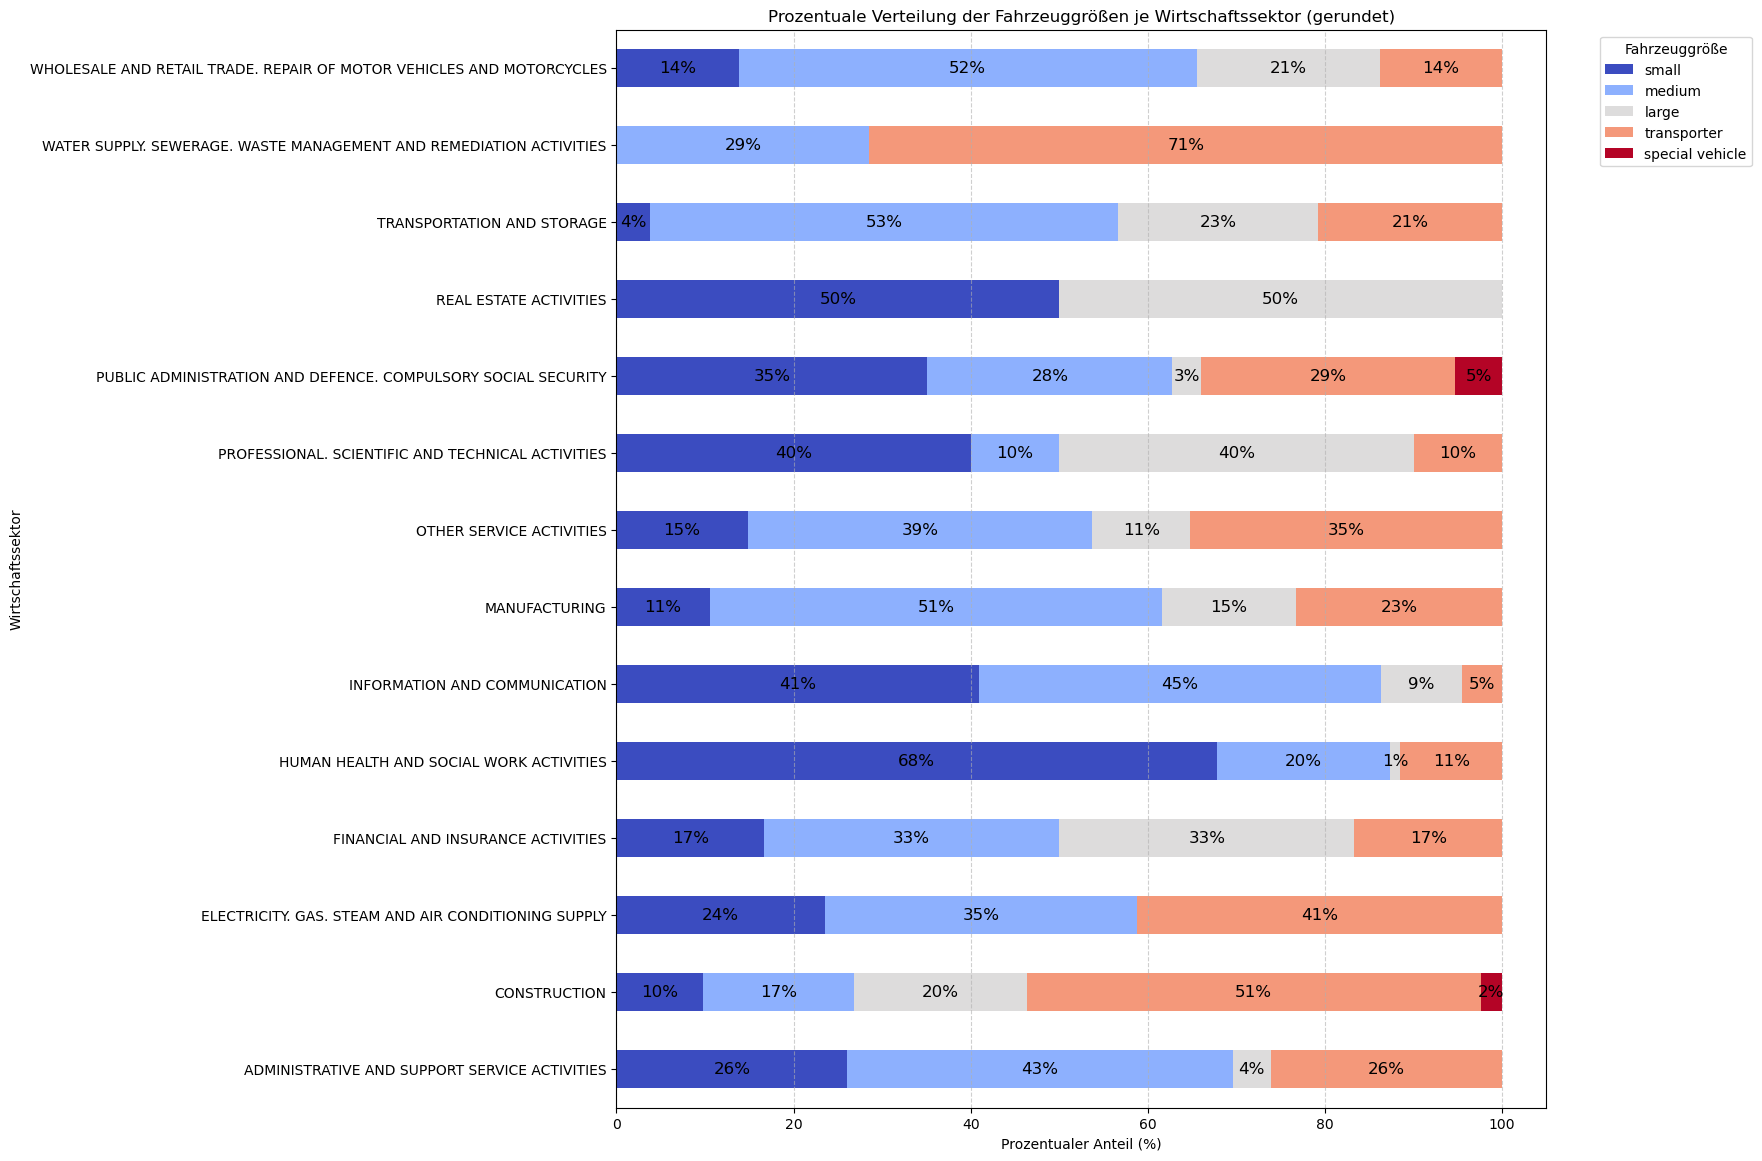

In [44]:
# Berechnen der Gesamtanzahl der Fahrzeuge pro Wirtschaftssektor und Fahrzeuggröße
total_vehicles_per_sector_size = df.groupby(["economic_sector", "vehicle_size"]).size().unstack().fillna(0)

# Umwandlung der absoluten Zahlen in Prozentwerte pro Sektor
total_vehicles_percentage = total_vehicles_per_sector_size.div(total_vehicles_per_sector_size.sum(axis=1), axis=0) * 100

# Sicherstellen, dass die Fahrzeuggrößen in der gewünschten Reihenfolge sind
desired_order = ["small", "medium", "large", "transporter", "special vehicle"]
total_vehicles_percentage = total_vehicles_percentage[desired_order]

# Erstellen des gestapelten Balkendiagramms für die prozentuale Verteilung mit Korrektur
plt.figure(figsize=(12, 14))  # Größere Breite für bessere Lesbarkeit

# Plotten der prozentualen Verteilung als gestapeltes Balkendiagramm
ax = total_vehicles_percentage.plot(kind="barh", stacked=True, colormap="coolwarm", figsize=(12, 14))

# Korrektur der Beschriftung: Nur Werte > 0.0% anzeigen und auf ganze Prozent runden
for container in ax.containers:
    labels = [f"{round(value)}%" if value > 0 else "" for value in container.datavalues]  # 0.0% wird nicht angezeigt
    ax.bar_label(container, labels=labels, label_type="center", fontsize=12, color="black")

# Labels und Titel
plt.xlabel("Prozentualer Anteil (%)")
plt.ylabel("Wirtschaftssektor")
plt.title("Prozentuale Verteilung der Fahrzeuggrößen je Wirtschaftssektor (gerundet)")
plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)  # Box um die Legende
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()


## Aufgeschlüsselt nach Fahrzeuggröße

<Figure size 1200x600 with 0 Axes>

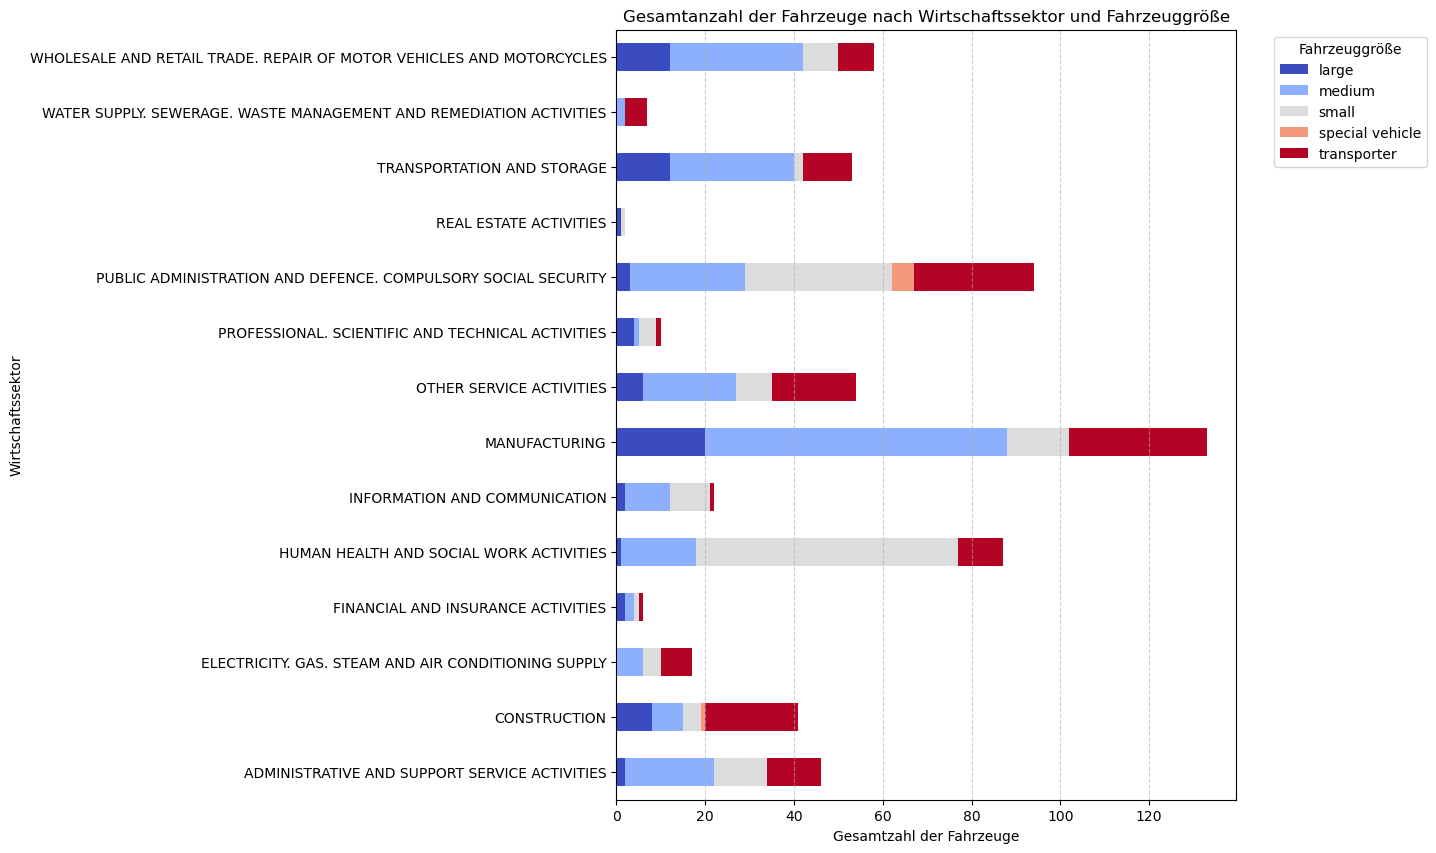

<Figure size 1200x600 with 0 Axes>

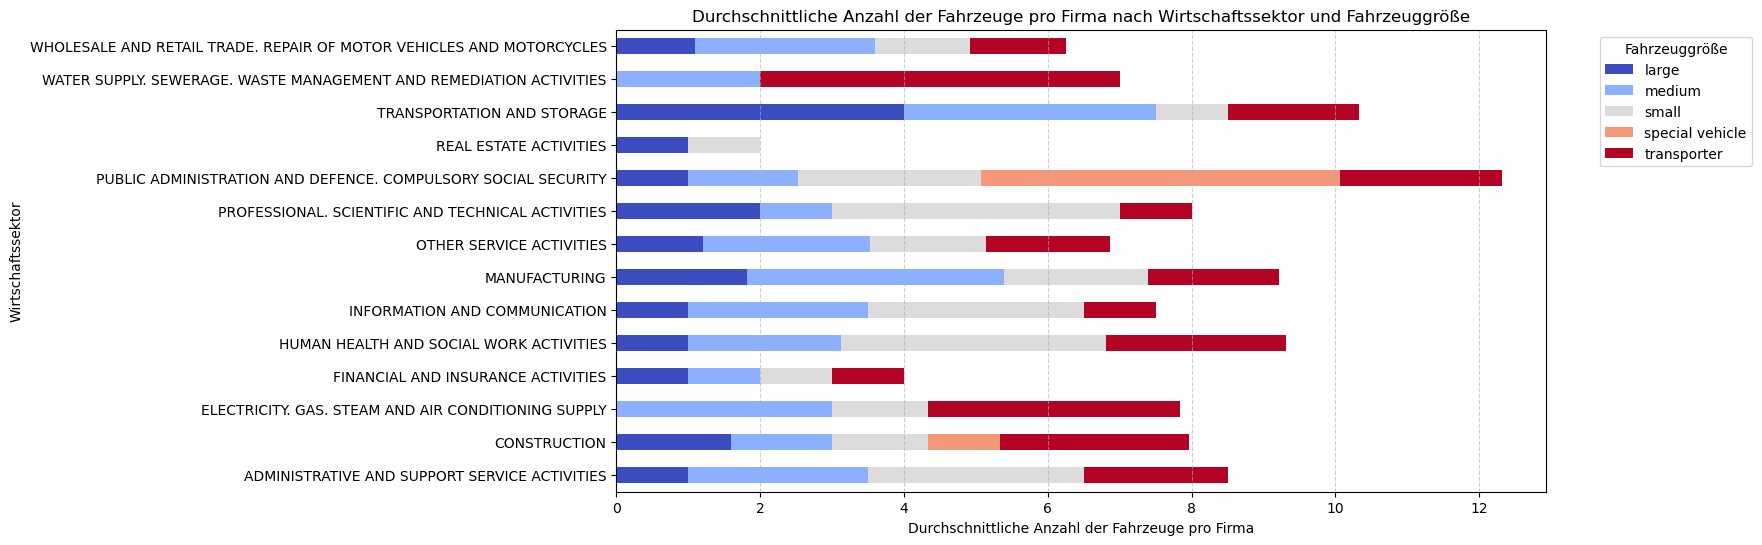

In [15]:
# Zählen der Gesamtzahl der Fahrzeuge pro Firma, Wirtschaftssektor und Fahrzeuggröße
vehicles_per_company_size = df.groupby(["company_id", "economic_sector", "vehicle_size"]).size().reset_index(name="total_vehicles")

# Durchschnittliche Anzahl der Fahrzeuge pro Firma innerhalb eines Wirtschaftssektors und Fahrzeuggröße berechnen
avg_vehicles_per_sector_size = vehicles_per_company_size.groupby(["economic_sector", "vehicle_size"])["total_vehicles"].mean().unstack()

# Gesamtanzahl der Fahrzeuge pro Wirtschaftssektor und Fahrzeuggröße berechnen
total_vehicles_per_sector_size = vehicles_per_company_size.groupby(["economic_sector", "vehicle_size"])["total_vehicles"].sum().unstack()

# Erstellen des Plots für die Gesamtzahl der Fahrzeuge pro Wirtschaftssektor nach Fahrzeuggröße
plt.figure(figsize=(12, 6))
total_vehicles_per_sector_size.plot(kind="barh", stacked=True, colormap="coolwarm", figsize=(8, 10))
plt.xlabel("Gesamtzahl der Fahrzeuge")
plt.ylabel("Wirtschaftssektor")
plt.title("Gesamtanzahl der Fahrzeuge nach Wirtschaftssektor und Fahrzeuggröße")
plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Erstellen des Plots für die durchschnittliche Anzahl der Fahrzeuge pro Firma nach Wirtschaftssektor und Fahrzeuggröße
plt.figure(figsize=(12, 6))
avg_vehicles_per_sector_size.plot(kind="barh", stacked=True, colormap="coolwarm", figsize=(12, 6))
plt.xlabel("Durchschnittliche Anzahl der Fahrzeuge pro Firma")
plt.ylabel("Wirtschaftssektor")
plt.title("Durchschnittliche Anzahl der Fahrzeuge pro Firma nach Wirtschaftssektor und Fahrzeuggröße")
plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

<Figure size 1000x1200 with 0 Axes>

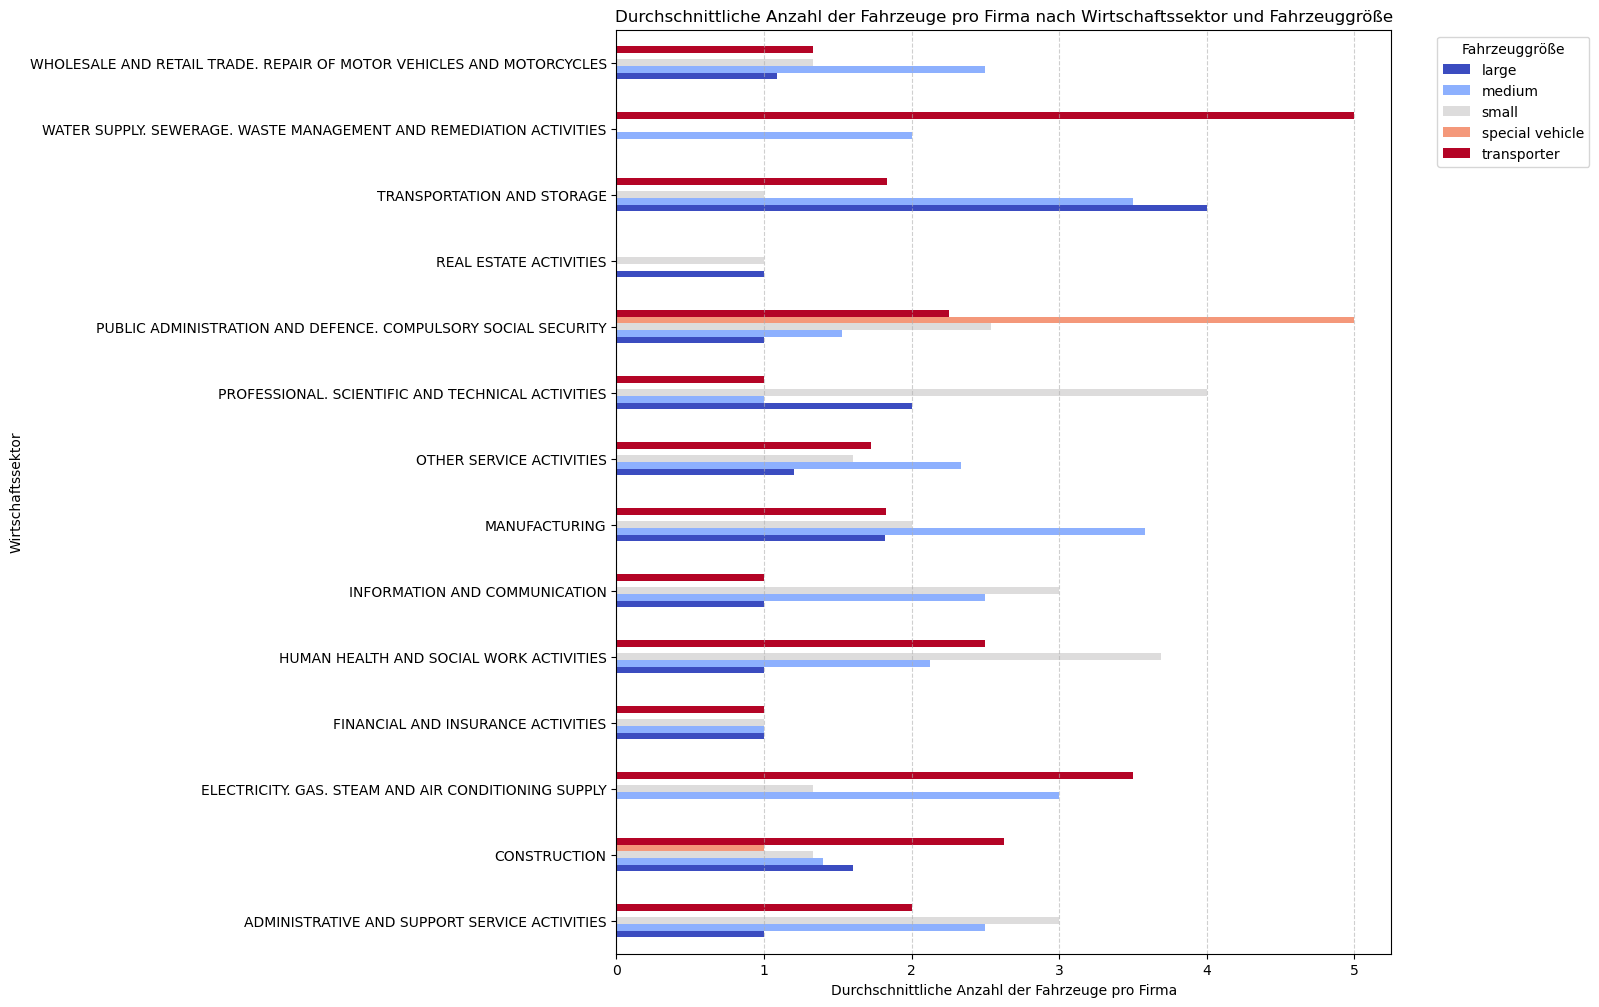

In [16]:

# Berechnen der Anzahl der Fahrzeuge pro Firma, Wirtschaftssektor und Fahrzeuggröße
vehicles_per_company_sector_size = df.groupby(["economic_sector", "vehicle_size", "company_id"]).size().reset_index(name="total_vehicles")

# Durchschnittliche Anzahl der Fahrzeuge pro Firma innerhalb jedes Wirtschaftssektors und Fahrzeuggröße berechnen
avg_vehicles_per_sector_size = vehicles_per_company_sector_size.groupby(["economic_sector", "vehicle_size"])["total_vehicles"].mean().unstack()

# Erstellen des Plots für die durchschnittliche Anzahl der Fahrzeuge pro Firma nach Wirtschaftssektor und Fahrzeuggröße
plt.figure(figsize=(10, 12))  # Hochformat für bessere Lesbarkeit in Word
ax = avg_vehicles_per_sector_size.plot(kind="barh", stacked=False, colormap="coolwarm", figsize=(10, 12))

## Werte auf den Balken anzeigen (gerundet auf 1 Dezimalstelle)
#for container in ax.containers:
#    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10, color="black")

# Labels und Titel
plt.xlabel("Durchschnittliche Anzahl der Fahrzeuge pro Firma")
plt.ylabel("Wirtschaftssektor")
plt.title("Durchschnittliche Anzahl der Fahrzeuge pro Firma nach Wirtschaftssektor und Fahrzeuggröße")
plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Speichern des Plots als SVG für Word
plt.savefig("Durchschnittliche_Fahrzeuge_pro_Firma_je_Sektor_und_Groesse.svg", format="svg", dpi=300)

# Anzeigen des Plots
plt.show()


# Fahrzleistung
## Pro Sektor


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laden der CSV-Dateien mit korrektem Trennzeichen
file_path1 = "REM2030_v2015.csv"  # Pfad zur Datei anpassen
file_path2 = "REM2030_v2015_car_info.csv"  # Pfad zur Datei anpassen

df1 = pd.read_csv(file_path1, delimiter=';')
df2 = pd.read_csv(file_path2, delimiter=';')

# Kombinieren der beiden DataFrames über die "id"-Spalte
df_combined = df1.merge(df2, on="id")

C:\Users\pasca\AppData\Local\Temp\ipykernel_17432\3008363003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_distance_per_sector.values, y=total_distance_per_sector.index, palette="Blues_r")


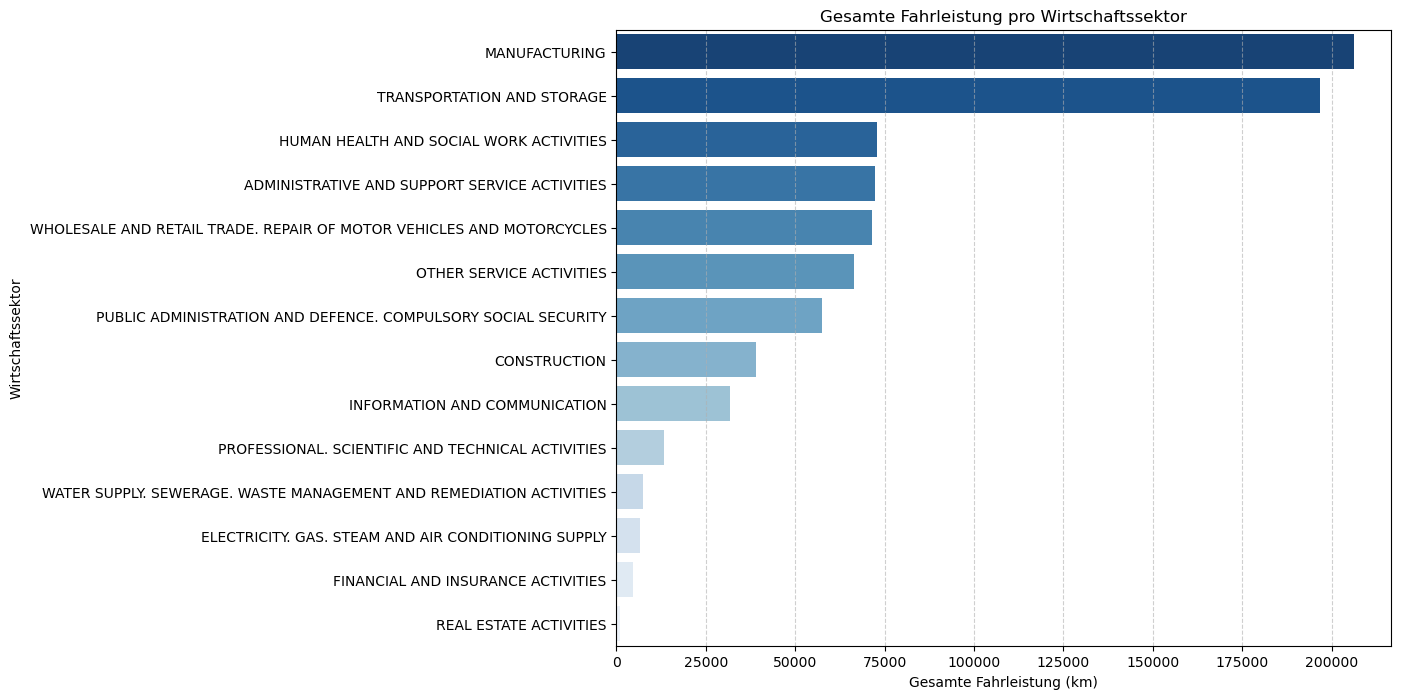

In [18]:

# Berechnen der gesamten Fahrleistung pro Wirtschaftssektor
total_distance_per_sector = df_combined.groupby("economic_sector")["distance"].sum().sort_values(ascending=False)

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sns.barplot(x=total_distance_per_sector.values, y=total_distance_per_sector.index, palette="Blues_r")

# Beschriftung der Achsen und Titel
plt.xlabel("Gesamte Fahrleistung (km)")
plt.ylabel("Wirtschaftssektor")
plt.title("Gesamte Fahrleistung pro Wirtschaftssektor")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()

## Durchschnittliche Fahzrleisung Pro Firma

C:\Users\pasca\AppData\Local\Temp\ipykernel_29320\993513628.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_distance_per_firm_sector.values, y=avg_distance_per_firm_sector.index, palette="Blues_r")


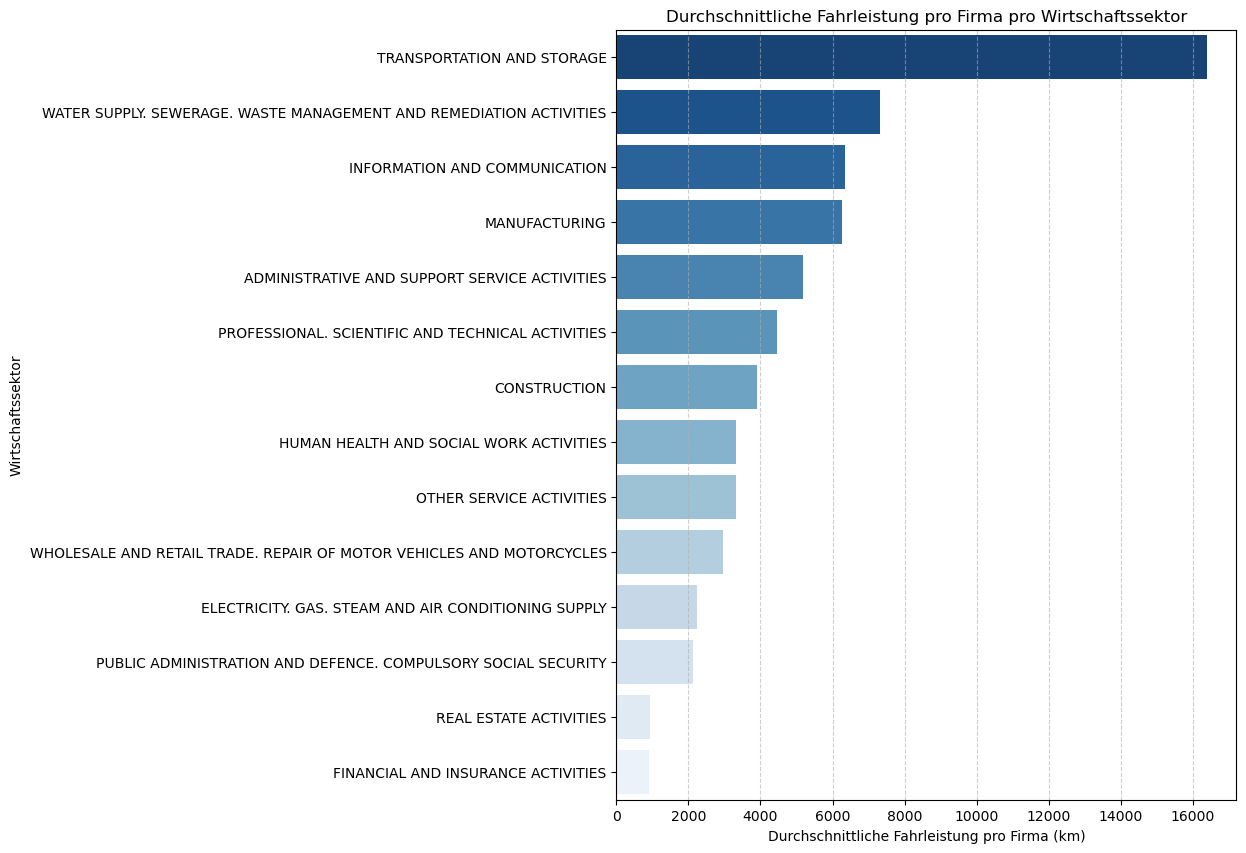

In [4]:
# Berechnen der durchschnittlichen Fahrleistung pro Firma innerhalb jedes Wirtschaftssektors
avg_distance_per_firm_sector = df_combined.groupby(["economic_sector", "company_id"])["distance"].sum().groupby("economic_sector").mean().sort_values(ascending=False)

# Erstellen des Plots
plt.figure(figsize=(8, 10))
sns.barplot(x=avg_distance_per_firm_sector.values, y=avg_distance_per_firm_sector.index, palette="Blues_r")

# Beschriftung der Achsen und Titel
plt.xlabel("Durchschnittliche Fahrleistung pro Firma (km)")
plt.ylabel("Wirtschaftssektor")
plt.title("Durchschnittliche Fahrleistung pro Firma pro Wirtschaftssektor")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()

## Fahrleistung nach Fahrzeuggröße

<Figure size 1200x600 with 0 Axes>

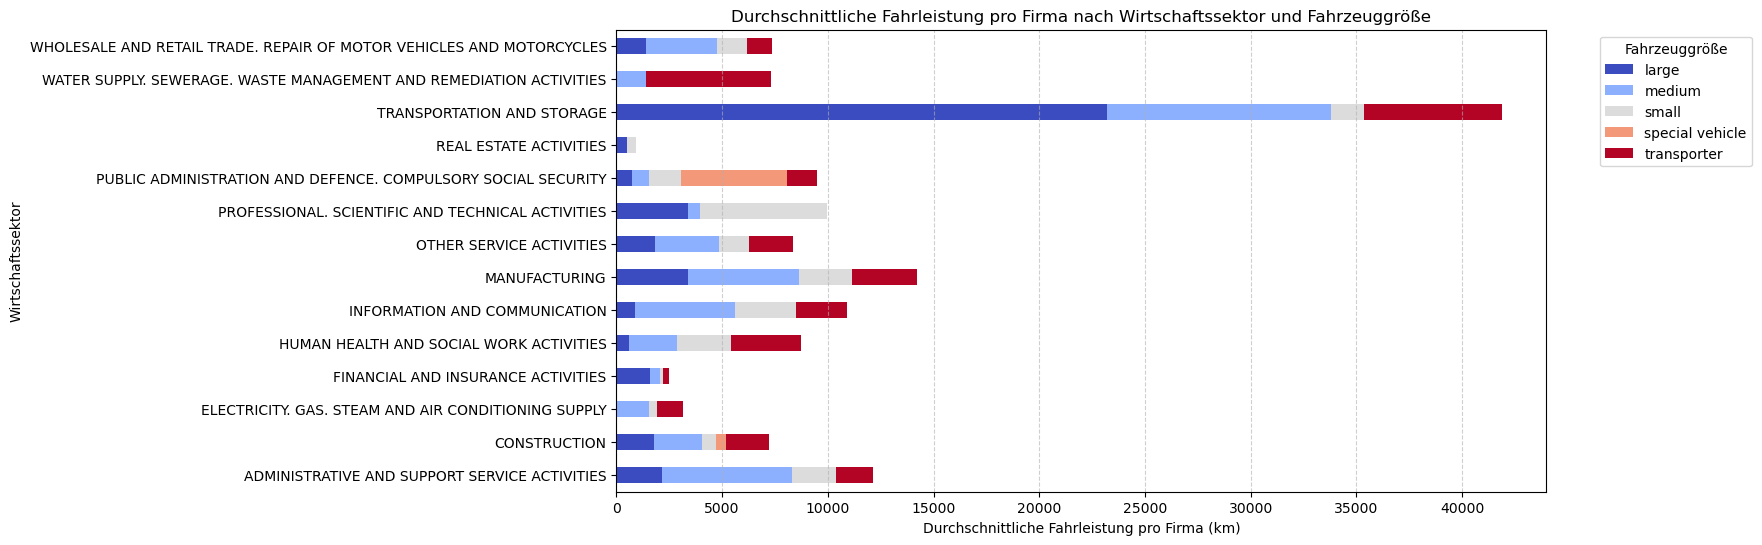

In [20]:
# Berechnen der durchschnittlichen Fahrleistung pro Firma, Wirtschaftssektor und Fahrzeuggröße
avg_distance_per_firm_sector_size = df_combined.groupby(["economic_sector", "vehicle_size", "company_id"])["distance"].sum()
avg_distance_per_firm_sector_size = avg_distance_per_firm_sector_size.groupby(["economic_sector", "vehicle_size"]).mean().unstack()

# Erstellen des Plots für die durchschnittliche Fahrleistung pro Firma nach Wirtschaftssektor und Fahrzeuggröße
plt.figure(figsize=(12, 6))
avg_distance_per_firm_sector_size.plot(kind="barh", stacked=True, colormap="coolwarm", figsize=(12, 6))

# Beschriftung der Achsen und Titel
plt.xlabel("Durchschnittliche Fahrleistung pro Firma (km)")
plt.ylabel("Wirtschaftssektor")
plt.title("Durchschnittliche Fahrleistung pro Firma nach Wirtschaftssektor und Fahrzeuggröße")
plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()

In [ ]:
# Durchscnittlich pro Fahrzeug aussagekräftiger!! (Note)

# Fahrtzeitdauer

C:\Users\pasca\AppData\Local\Temp\ipykernel_29320\3362080877.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="trip_duration", y="economic_sector", data=df_combined, palette="coolwarm", showfliers=False)


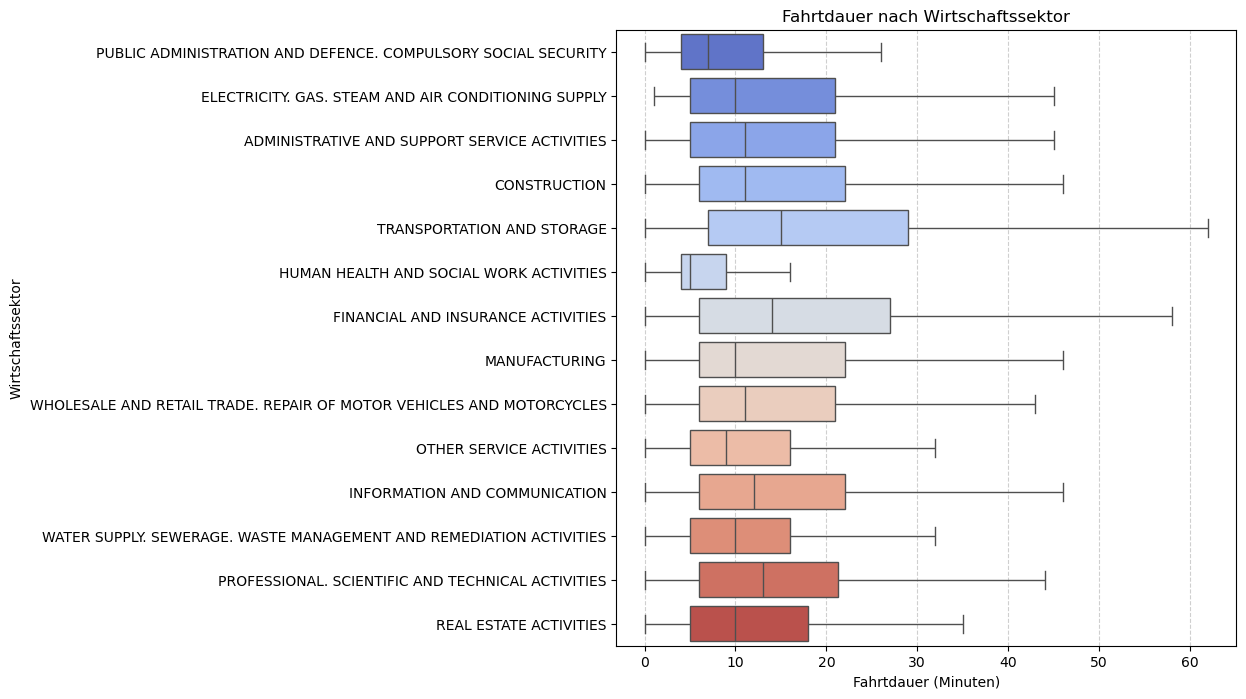

Die durchschnittliche Fahrtdauer beträgt 16.53 Minuten.


In [6]:
# Konvertieren der Zeitangaben in datetime-Format
df_combined["departure_time"] = pd.to_datetime(df_combined[['deptyear', 'deptmonth', 'deptday', 'depthour', 'deptminute']].rename(columns={'deptyear':'year', 'deptmonth':'month', 'deptday':'day', 'depthour':'hour', 'deptminute':'minute'}))
df_combined["arrival_time"] = pd.to_datetime(df_combined[['arryear', 'arrmonth', 'arrday', 'arrhour', 'arrminute']].rename(columns={'arryear':'year', 'arrmonth':'month', 'arrday':'day', 'arrhour':'hour', 'arrminute':'minute'}))

# Berechnen der Dauer jeder Fahrt in Minuten
df_combined["trip_duration"] = (df_combined["arrival_time"] - df_combined["departure_time"]).dt.total_seconds() / 60

# Berechnen der durchschnittlichen Fahrtdauer
average_trip_duration = df_combined["trip_duration"].mean()



# Erstellen eines Boxplots zur Fahrtdauer nach Wirtschaftssektor
plt.figure(figsize=(8, 8))
sns.boxplot(x="trip_duration", y="economic_sector", data=df_combined, palette="coolwarm", showfliers=False)

# Achsenbeschriftungen und Titel
plt.xlabel("Fahrtdauer (Minuten)")
plt.ylabel("Wirtschaftssektor")
plt.title("Fahrtdauer nach Wirtschaftssektor")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()

# Durchschnittliche Fahrtdauer ausgeben
print(f"Die durchschnittliche Fahrtdauer beträgt {average_trip_duration:.2f} Minuten.")

# Distance 

C:\Users\pasca\AppData\Local\Temp\ipykernel_29320\2029548312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="distance", y="economic_sector", data=df_combined, palette="coolwarm", showfliers=False)


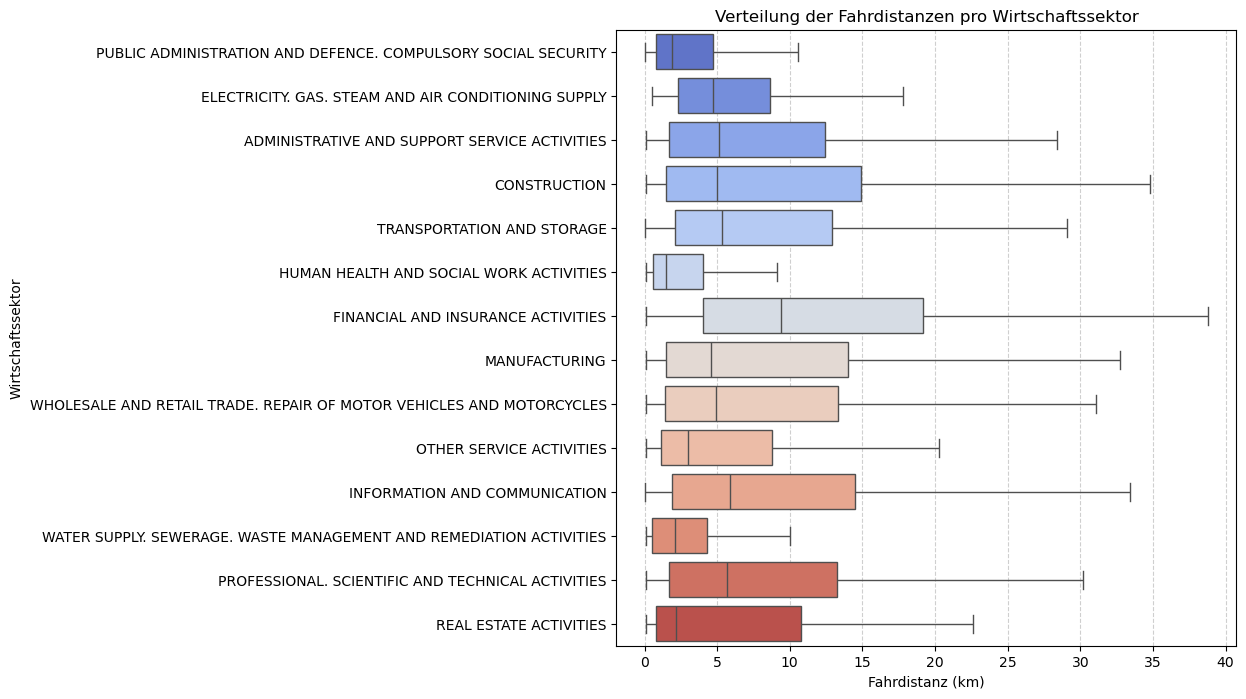

In [7]:
# Erstellen des Boxplots zur Fahrdistanz pro Wirtschaftssektor
plt.figure(figsize=(8, 8))
sns.boxplot(x="distance", y="economic_sector", data=df_combined, palette="coolwarm", showfliers=False)

# Achsenbeschriftungen und Titel
plt.xlabel("Fahrdistanz (km)")
plt.ylabel("Wirtschaftssektor")
plt.title("Verteilung der Fahrdistanzen pro Wirtschaftssektor")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()

# Aufzeichnungsdauer

## Wichtig für die Filterung


## Zeitstrahl der einzelnen Aufzeichnungen

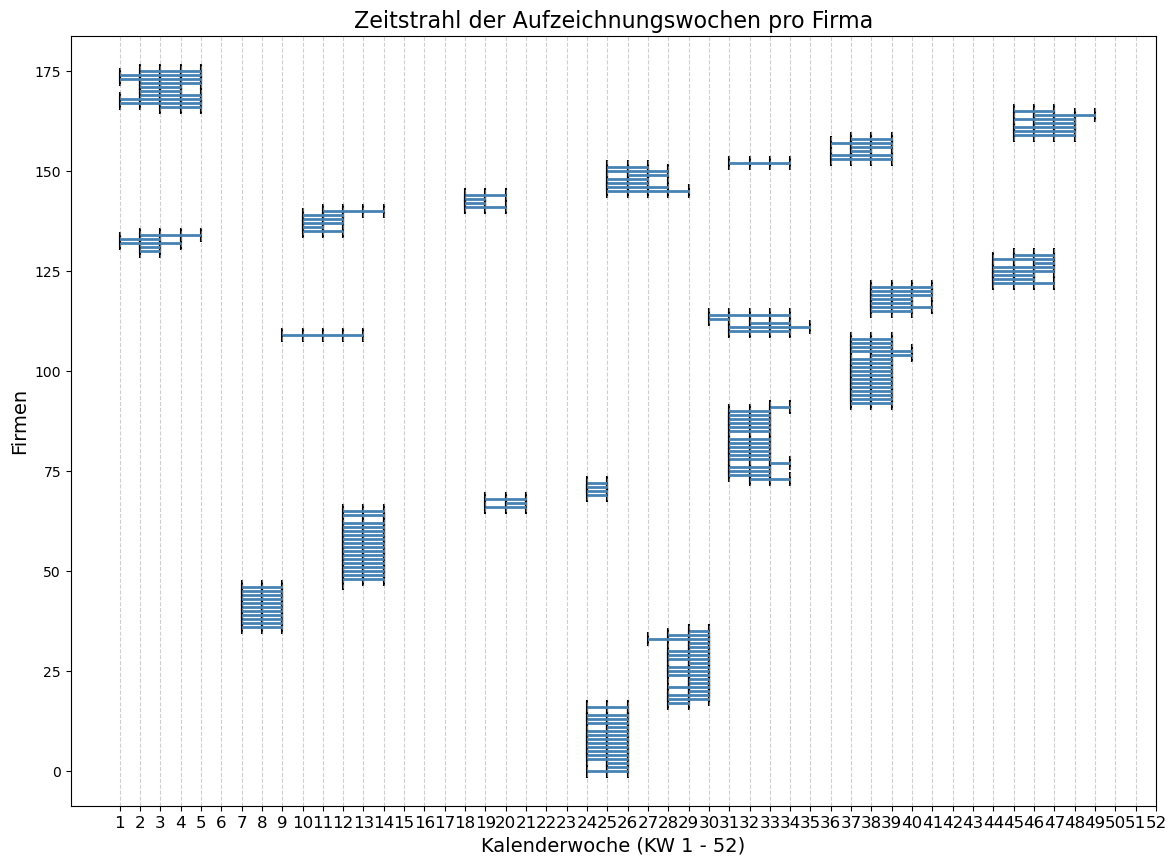

Anzahl der Firmen berücksichtigt: 176
Anzahl der Firmen nicht berücksichtigt (keine Wochenaufzeichnungen): 2
Anzahl der Firmen mit einer Aufzeichnungsdauer von 1 KW: 4
Anzahl der Firmen mit einer Aufzeichnungsdauer von 2 KW: 26
Anzahl der Firmen mit einer Aufzeichnungsdauer von 3 KW: 110
Anzahl der Firmen mit einer Aufzeichnungsdauer von 4 KW: 28
Anzahl der Firmen mit einer Aufzeichnungsdauer von 5 KW: 8
Anzahl der Firmen mit einer Aufzeichnungsdauer von 6 KW: 0


In [17]:
# Erstellen des Zeitstrahldiagramms mit horizontalen Linien pro Firma
plt.figure(figsize=(14, 10))

valid_firms = {}
excluded_firms = 0
week_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}  # Speichert die Anzahl der Firmen für spezifische KW-Dauern

for company, weeks in company_weeks_recorded.items():
    if weeks:  # Sicherstellen, dass Wochen vorhanden sind
        # Prüfen, ob die Firma über den Jahreswechsel hinweg aktiv war (z. B. KW 50, 51, 1, 2)
        if max(weeks) - min(weeks) > 30:  # Annahme: Jahreswechsel, wenn große Differenz
            corrected_weeks = {w if w >= min(weeks) else w + 52 for w in weeks}  # Korrigierte KW-Nummern
        else:
            corrected_weeks = weeks

        valid_firms[company] = sorted(corrected_weeks)

        # Berechnung der Gesamtanzahl der Wochen für diese Firma
        num_weeks = len(corrected_weeks)
        if num_weeks in week_counts:
            week_counts[num_weeks] += 1

    else:
        excluded_firms += 1  # Firmen ohne Daten zählen

# Erstellen des Diagramms
for i, (company, weeks) in enumerate(valid_firms.items()):
    plt.hlines(y=i, xmin=min(weeks), xmax=max(weeks), color="steelblue", linewidth=2)  # Horizontale Linie
    plt.scatter(weeks, [i] * len(weeks), color="black", marker="|", s=100)  # Marker für jede erfasste Woche

# Achsenbeschriftungen und Titel
plt.xlabel("Kalenderwoche (KW 1 - 52)", fontsize=14)
plt.ylabel("Firmen", fontsize=14)
plt.title("Zeitstrahl der Aufzeichnungswochen pro Firma", fontsize=16)
plt.xticks(range(1, 53), fontsize=12)  # KW 1 bis 52
#plt.yticks(range(len(valid_firms)), [f"Firma {c}" for c in valid_firms.keys()], fontsize=10)

# Grid für bessere Lesbarkeit
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()

# Anzahl der berücksichtigten und nicht berücksichtigten Firmen ausgeben
num_firms = len(valid_firms)
print(f"Anzahl der Firmen berücksichtigt: {num_firms}")
print(f"Anzahl der Firmen nicht berücksichtigt (keine Wochenaufzeichnungen): {excluded_firms}")

# Ausgabe der Anzahl der Firmen mit bestimmten Aufzeichnungsdauern
for weeks, count in week_counts.items():
    print(f"Anzahl der Firmen mit einer Aufzeichnungsdauer von {weeks} KW: {count}")


# Auzeichnungswochen (Montag - Sonntag)
## Siehe Fahrdatentabelle 

# Gleiche Tabellen, nur für die 8 übrig gebliebnenen Sektoren

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definieren der auszuschließenden Wirtschaftssektoren
excluded_sectors = [
    'INFORMATION AND COMMUNICATION',
    'ELECTRICITY. GAS. STEAM AND AIR CONDITIONING SUPPLY',
    'PROFESSIONAL. SCIENTIFIC AND TECHNICAL ACTIVITIES',
    'WATER SUPPLY. SEWERAGE. WASTE MANAGEMENT AND REMEDIATION ACTIVITIES',
    'FINANCIAL AND INSURANCE ACTIVITIES',
    'REAL ESTATE ACTIVITIES'
]

# Herausfiltern der unerwünschten Wirtschaftssektoren aus df_combined
df_filtered = df_combined[~df_combined["economic_sector"].isin(excluded_sectors)]

C:\Users\pasca\AppData\Local\Temp\ipykernel_29320\3452275222.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_distance_per_firm_sector.values, y=avg_distance_per_firm_sector.index, palette="Blues_r")


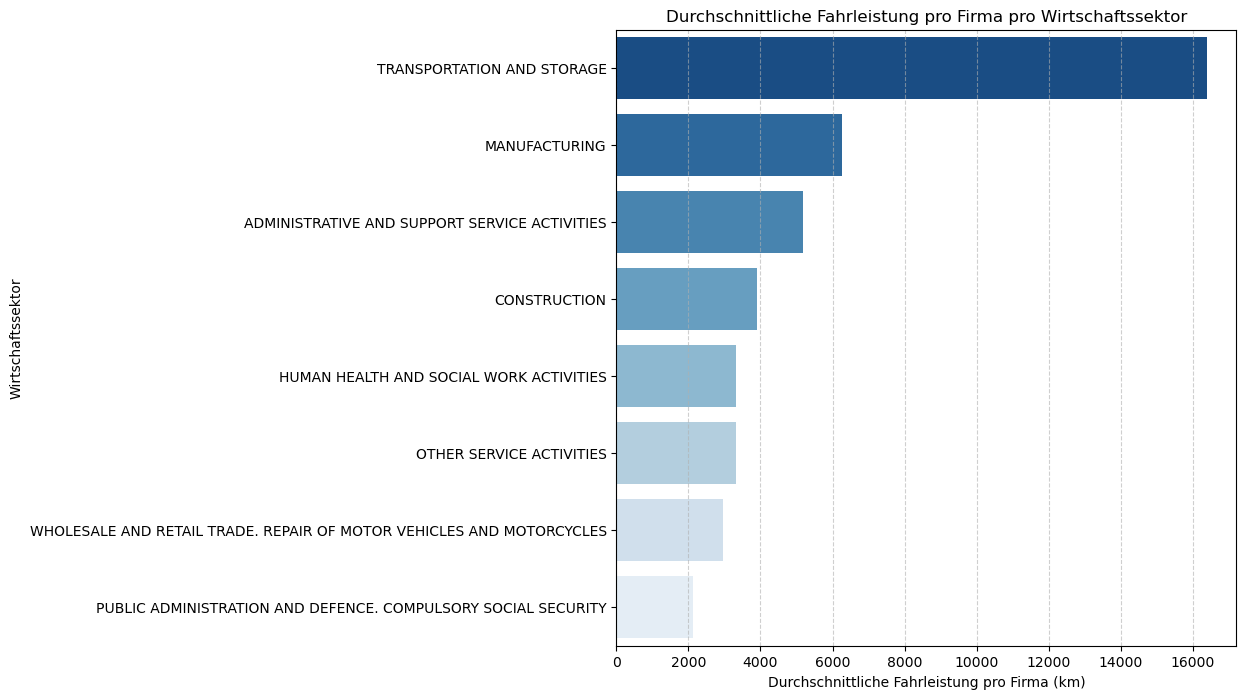

In [ ]:

# Berechnen der durchschnittlichen Fahrleistung pro Firma innerhalb jedes Wirtschaftssektors 
avg_distance_per_firm_sector = (
    df_filtered.groupby(["economic_sector", "company_id"])["distance"]
    .sum()
    .groupby("economic_sector")
    .mean()
    .sort_values(ascending=False)
)

# Erstellen des Plots
plt.figure(figsize=(8, 8))
sns.barplot(x=avg_distance_per_firm_sector.values, y=avg_distance_per_firm_sector.index, palette="Blues_r")

# Beschriftung der Achsen und Titel
plt.xlabel("Durchschnittliche Fahrleistung pro Firma (km)")
plt.ylabel("Wirtschaftssektor")
plt.title("Durchschnittliche Fahrleistung pro Firma pro Wirtschaftssektor")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()



<Figure size 800x800 with 0 Axes>

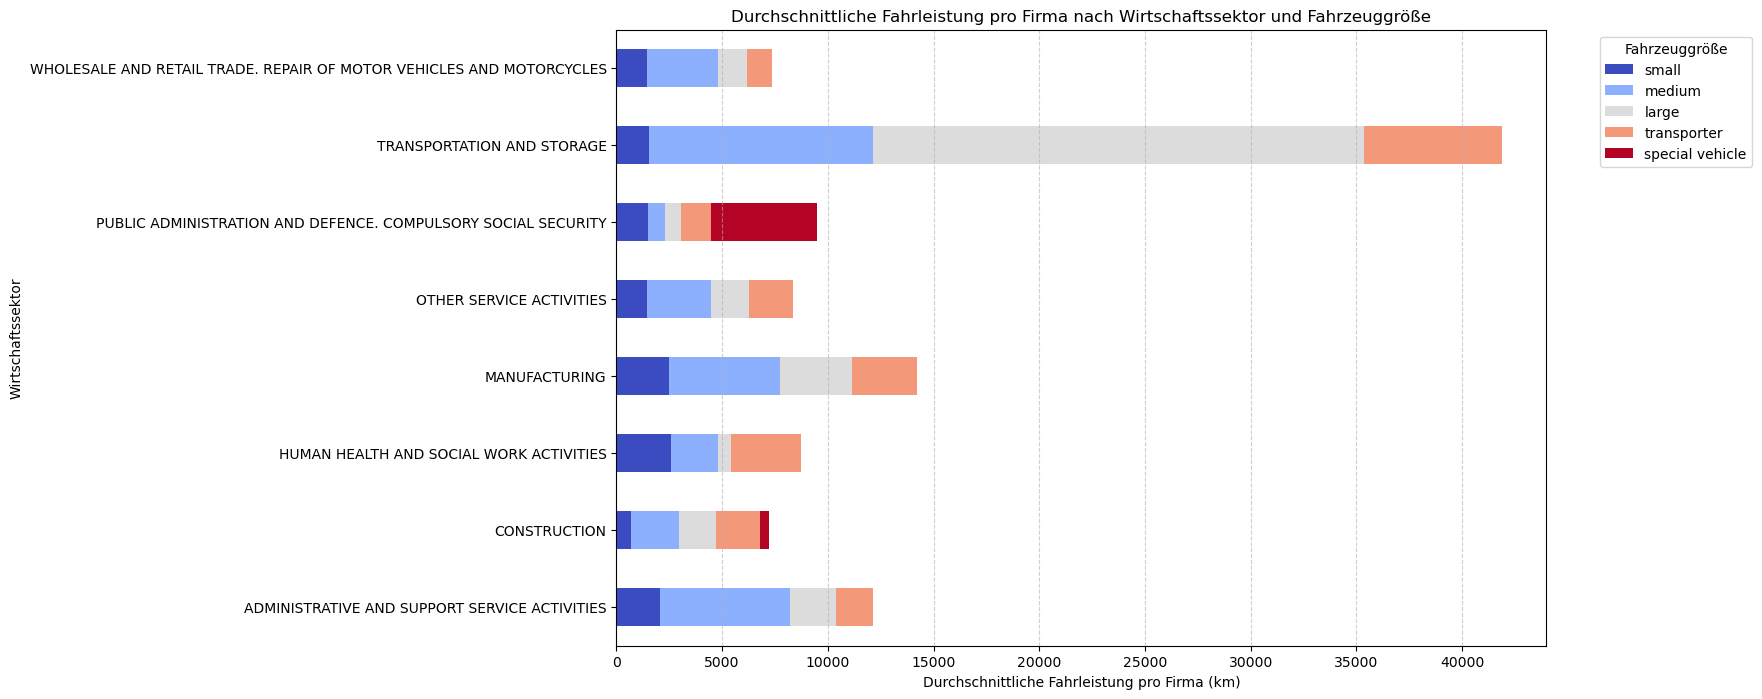

In [16]:
# Berechnen der durchschnittlichen Fahrleistung pro Firma, Wirtschaftssektor und Fahrzeuggröße
avg_distance_per_firm_sector_size = (
    df_filtered.groupby(["economic_sector", "vehicle_size", "company_id"])["distance"]
    .sum()
    .groupby(["economic_sector", "vehicle_size"])
    .mean()
    .unstack()
)

# Sicherstellen, dass die Spalten in der gewünschten Reihenfolge vorliegen
vehicle_order = ["small", "medium", "large", "transporter", "special vehicle"]
avg_distance_per_firm_sector_size = avg_distance_per_firm_sector_size[vehicle_order]

# Erstellen des Plots
plt.figure(figsize=(8, 8))
avg_distance_per_firm_sector_size.plot(kind="barh", stacked=True, colormap="coolwarm", figsize=(12, 8))

# Beschriftung der Achsen und Titel
plt.xlabel("Durchschnittliche Fahrleistung pro Firma (km)")
plt.ylabel("Wirtschaftssektor")
plt.title("Durchschnittliche Fahrleistung pro Firma nach Wirtschaftssektor und Fahrzeuggröße")
plt.legend(title="Fahrzeuggröße", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()

C:\Users\pasca\AppData\Local\Temp\ipykernel_29320\641910078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="distance", y="economic_sector", data=df_filtered, palette="coolwarm", showfliers=False)


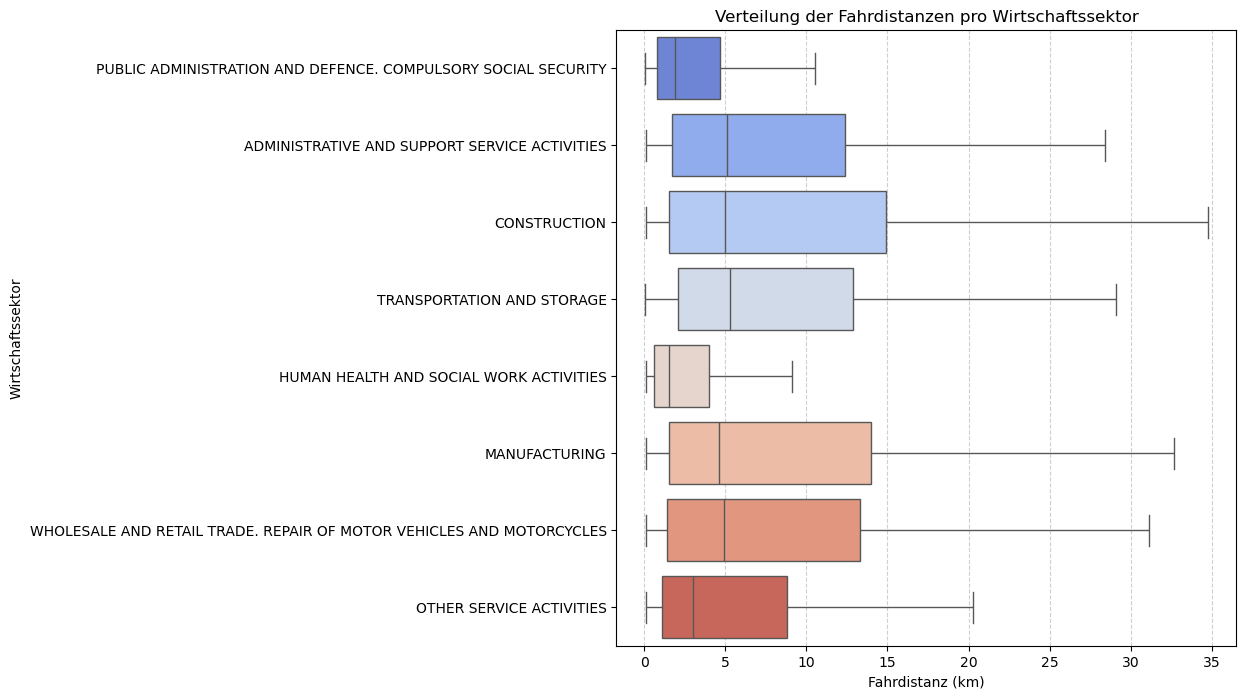

In [19]:
# Erstellen des Boxplots zur Fahrdistanz pro Wirtschaftssektor
plt.figure(figsize=(8, 8))
sns.boxplot(x="distance", y="economic_sector", data=df_filtered, palette="coolwarm", showfliers=False)

# Achsenbeschriftungen und Titel
plt.xlabel("Fahrdistanz (km)")
plt.ylabel("Wirtschaftssektor")
plt.title("Verteilung der Fahrdistanzen pro Wirtschaftssektor")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Anzeigen des Plots
plt.show()